In [1]:
import sqlite3
import matplotlib
%matplotlib inline

In [2]:
import pandas as pd


In [3]:
con = sqlite3.connect("nflPPdb.sqlite")
players = pd.read_sql_query('SELECT * FROM players', con)
combine = pd.read_sql_query('SELECT * FROM combine', con)
rr = pd.read_sql_query('SELECT * FROM rr', con)
passing = pd.read_sql_query('SELECT * FROM passing', con)

In [7]:
rr['total_yards'] = rr['receiving_yards'] + rr['rushing_yards']
ydsData = rr[rr['position'].isin(['QB' , 'RB'])]
ydsData = ydsData.set_index(ydsData['name'])
ydsData = ydsData.groupby(['name'])['total_yards'].sum()
ydsData = ydsData.dropna()
ydsData = ydsData.drop_duplicates()

In [8]:
combineData = combine[combine['position'].isin(['QB' , 'RB'])]
combineData = combineData.set_index(combineData['name'])
combineData = combineData['BMI']
combineData = combineData.drop_duplicates()

In [16]:
regdata = pd.concat([combineData[0:100],ydsData[0:100]],axis=1)
regdata = regdata.dropna()
regdata

,BMI,total_yards
Aaron Brooks,25.304709,870
Anthony Thomas,30.109569,16525
Daunte Culpepper,31.786704,2080
Deuce McAllister,29.994370,32270
Donovan McNabb,29.320672,5615
Edgerrin James,29.183712,59365
Jamal Lewis,32.426346,62430
James Jackson,29.994049,3050
Kevin Faulk,31.920415,13805


In [17]:
import statsmodels.api as sm

In [19]:
mod = sm.OLS(regdata['BMI'],regdata['total_yards'])

In [20]:
res = mod.fit()

In [22]:
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     7.816
Date:                Sun, 06 Mar 2016   Prob (F-statistic):             0.0234
Time:                        21:26:20   Log-Likelihood:                -40.335
No. Observations:                   9   AIC:                             82.67
Df Residuals:                       8   BIC:                             82.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
total_yards     0.0007      0.000      2.796      

/Users/long/miniconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1557: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


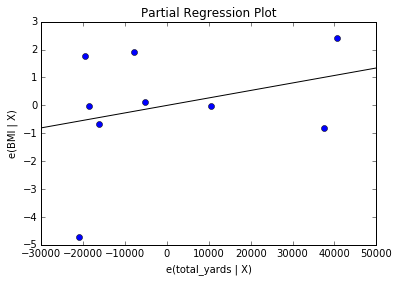

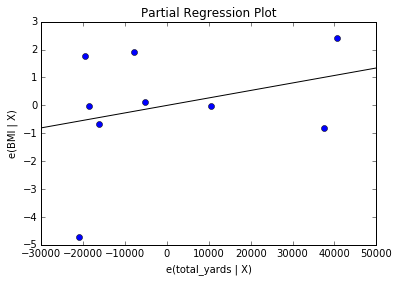

In [30]:
sm.graphics.plot_partregress('BMI', 'total_yards', [], data = regdata, obs_labels=False)

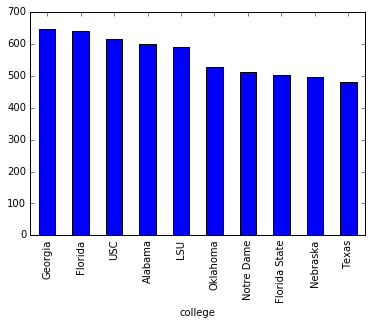

In [11]:
combine_sort = combine.groupby(['college'])['index'].count()
combine_sort = combine_sort.sort_values(ascending =False)
combine_sort[0:10].plot(kind = 'Bar')